# Big Data Technologies and Applications - Google Trends API exercise - Pytrends

# >>>> In order to start please apply the following tags for analysis <<<<

# pip install pytrends
# pip install seaborn
# pip install plotly
# conda install -c anaconda pandas (if necessary) 


# Google trends API - https://github.com/GeneralMills/pytrends

The following API methods are available:

Interest Over Time: returns historical, indexed data for when the keyword was searched most as shown on Google Trends' Interest Over Time section.

Historical Hourly Interest: returns historical, indexed, hourly data for when the keyword was searched most as shown on Google Trends' Interest Over Time section. It sends multiple requests to Google, each retrieving one week of hourly data. It seems like this would be the only way to get historical, hourly data.

Interest by Region: returns data for where the keyword is most searched as shown on Google Trends' Interest by Region section.

Related Topics: returns data for the related keywords to a provided keyword shown on Google Trends' Related Topics section.

Related Queries: returns data for the related keywords to a provided keyword shown on Google Trends' Related Queries section.

Trending Searches: returns data for latest trending searches shown on Google Trends' Trending Searches section.

Top Charts: returns the data for a given topic shown in Google Trends' Top Charts section.

Suggestions: returns a list of additional suggested keywords that can be used to refine a trend search.

In [21]:
import sys
!{sys.executable} -m pip install pytrends

In [22]:
!{sys.executable} -m pip install seaborn

In [23]:
!{sys.executable} -m pip install plotly

In [24]:
from pytrends.request import TrendReq
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
from IPython.display import display, HTML

In [25]:
pytrends = TrendReq(hl='en-US', tz=360)

In [26]:
def set_new_query(kwords, timeframe):
    pytrends.build_payload(kwords, cat=0, timeframe=timeframe, geo='', gprop='')
    return kwords

In [27]:
def get_interest_over_time():
    df_ = pytrends.interest_over_time()
    df_.drop(['isPartial'], axis='columns', inplace=True)
    df_.reset_index(inplace=True)
    df_.date = pd.to_datetime(df_.date, format='%Y-%m-%d')
    df_.rename(columns={'date': 'Date'}, inplace=True)
    return df_

In [28]:
def get_interest_by_region(): 
    df_ = pytrends.interest_by_region(resolution='COUNTRY')
    df_ = df_.loc[~(df_==0).all(axis=1)]
    df_.reset_index(inplace=True)
    df_.rename(columns={'geoName': 'Region'}, inplace=True)
    return df_

In [29]:
def get_related_queries(): 
    return pytrends.related_queries()

In [30]:
def get_related_topics():
    return pytrends.related_topics()

# Some useful functions

In [31]:
def plot_interest_over_time(kwords, dataframe=None, update=False):
    
    color_list = ['navy', 'red', 'green', 'magenta', 'orange', 'purple']
    data = []
    
    if update:
        df_ = get_interest_over_time()
    else:
        df_ = dataframe
   
    if dataframe is not None:
        dataframe = df_

    for i in range(len(kwords)):
        trace = go.Scatter(x=list(df_.Date),
                          y=list(df_[kwords[i]]),
                          name = kwords[i],
                          line = dict(color = color_list[i])
                         )
        data.append(trace)
    
    layout = dict(
        title='Interest over time',
        yaxis={'title': 'Interest'},
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1m',
                         step='month',
                         stepmode='backward'),
                    dict(count=6,
                         label='6m',
                         step='month',
                         stepmode='backward'),
                    dict(count=1,
                        label='YTD',
                        step='year',
                        stepmode='todate'),
                    dict(count=1,
                        label='1y',
                        step='year',
                        stepmode='backward'),
                    dict(step='all')
                ])
            ),
            rangeslider=dict(
                visible = True
            ),
            type='date'
        )
    )

    fig = dict(data=data, layout=layout)
    py.iplot(fig)
    return df_

In [32]:
def table_interest_over_time(kwords, dataframe=None, update=False):
    if update:
        df_ = get_interest_over_time()
    else:
        df_ = dataframe
    if dataframe is not None:
        dataframe = df_
    py.iplot(ff.create_table(df_.tail(10)))
    return df_

In [33]:
def table_interest_by_region(kwords, dataframe=None, update=False):
    if update:
        df_ = get_interest_by_region()
    else:
        df_ = dataframe
    if dataframe is not None:
        dataframe = df_
    py.iplot(ff.create_table(df_.head(10)))
    return df_

In [34]:
def barplot_interest_by_region(kwords, dataframe=None, update=False):
    
    if update:
        df_ = get_interest_by_region()
    else:
        df_ = dataframe
    if dataframe is not None:
        dataframe = df_

    x = df_.Region

    data = []

    for each in kwords:
        trace = {
          'x': x,
          'y': df_[each],
          'name': each,
          'type': 'bar'
        }
        data.append(trace)

    layout = {
      'xaxis': {'title': 'Countries'},
      'yaxis': {'title': 'Interest'},
      'barmode': 'relative',
      'title': 'Compared breakdown by country'
    }

    py.iplot({'data': data, 'layout': layout})
    return df_

In [35]:
def table_related_queries(kwords, queries, n=10):
    for each in kwords:
        df_rq_top = pd.DataFrame(queries[each]['top'])
        df_rq_rising = pd.DataFrame(queries[each]['rising'])
        df_rq = pd.concat([df_rq_top, df_rq_rising], axis=1, keys=(["Top", "Rising"])).reset_index(drop=True)
        df_rq.index = np.arange(1, len(df_rq) + 1)
        print(each + " related queries")
        display(df_rq.head(n))

In [36]:
def table_related_topics(kwords, topics, n=10):
    for each in kwords:
        df_rq_top = pd.DataFrame(topics[each]['top'])
        df_rq_rising = pd.DataFrame(topics[each]['rising'])
        df_rq = pd.concat([df_rq_top, df_rq_rising], axis=1, keys=(["Top", "Rising"])).reset_index(drop=True)
        df_rq.index = np.arange(1, len(df_rq) + 1)
        print(each + " topics")
        display(df_rq.head(n))
        #df_ = pd.DataFrame(topics[each])
        #df_.drop(['mid'], axis='columns', inplace=True)
        #print(each + " related topics")
        #py.iplot(ff.create_table(df_.head(n)))

# Please analyze the following entries at Google Trends?

1.1 Big data tools and big data platforms Is there any increase wrt other? If yes, search for the reason? Check the countries interesting to the keywords (rising/top comparison)

2.2 Apache Hadoop and Big Data Is there any correlation between them? If yes, when and how can you measure it? What is Apache meant for? What are the high correlated Apache big data projects in last two years? As stated in the first bullet, please check wrt countries/cities interesting to the keywords (rising/top comparison)

# Is there any releation between "Big data tools" and "Big data platforms"

In [37]:
kw_list = set_new_query(["Big data tools", "Big data platforms"], "all")

In [38]:
df = table_interest_over_time(kw_list, None, True);

In [39]:
display(df.describe().T.round(2))
display(df.corr().round(2))

,count,mean,std,min,25%,50%,75%,max
Big data tools,218.0,29.75,30.73,0.0,0.0,22.0,58.75,100.0
Big data platforms,218.0,3.59,5.10,0.0,0.0,0.0,6.00,26.0


,Big data tools,Big data platforms
Big data tools,1.00,0.71
Big data platforms,0.71,1.00


In [40]:
plot_interest_over_time(kw_list, df);

In [41]:
df_by_region = table_interest_by_region(kw_list, None, True)

In [42]:
barplot_interest_by_region(kw_list, df_by_region);

In [43]:
table_related_queries(kw_list, get_related_queries())

Big data tools related queries


Top                              Rising         
                           query value                         query    value
1       big data analytics tools   100      big data analytics tools  1554150
2             big data analytics    95            big data analytics  1479150
3             tools for big data    91            tools for big data  1413750
4                         hadoop    36                        hadoop   557450
5               what is big data    35              what is big data   550150
6   tools for big data analytics    30  tools for big data analytics   473400
7              big data analysis    30             big data analysis   466950
8        big data software tools    28       big data software tools   437850
9        big data analysis tools    27       big data analysis tools   417750
10  big data visualization tools    17  big data visualization tools   262600

Big data platforms related queries


Top        \
                                               query value   
1                       big data analytics platforms   100   
2  what is a key consideration when evaluating pl...    16   

                                              Rising          
                                               query   value  
1                       big data analytics platforms  782300  
2  what is a key consideration when evaluating pl...  124200

# How about the following keywords?  

In [44]:
kw_list = set_new_query(["Big data",  "Data Science", "Hadoop", "Data Scientist", "IoT"], 'all')

In [45]:
df = plot_interest_over_time(kw_list, None, True);

In [46]:
display(df.corr().round(2))

,Big data,Data Science,Hadoop,Data Scientist,IoT
Big data,1.00,0.69,0.78,0.77,0.83
Data Science,0.69,1.00,0.16,0.98,0.91
Hadoop,0.78,0.16,1.00,0.28,0.38
Data Scientist,0.77,0.98,0.28,1.00,0.94
IoT,0.83,0.91,0.38,0.94,1.00


In [47]:
kw_list = set_new_query(["Big Data", "Apache Hadoop", "Apache Spark"], 'all')

In [48]:
df = table_interest_over_time(kw_list, None, True)

In [49]:
plot_interest_over_time(kw_list, df);

In [50]:
display(df.describe().T.round(2))
display(df.corr().round(2))

,count,mean,std,min,25%,50%,75%,max
Big Data,218.0,41.00,34.88,0.0,5.0,39.5,75.75,100.0
Apache Hadoop,218.0,1.63,1.39,0.0,0.0,1.0,3.00,5.0
Apache Spark,218.0,2.92,3.51,0.0,0.0,0.0,7.00,11.0


,Big Data,Apache Hadoop,Apache Spark
Big Data,1.00,0.77,0.91
Apache Hadoop,0.77,1.00,0.63
Apache Spark,0.91,0.63,1.00


# Countries interesting the "Big data", "Apache Hadoop" and "Apache Spark"

In [51]:
barplot_interest_by_region(kw_list, None, True);

In [52]:
table_related_queries(kw_list, get_related_queries())

Big Data related queries


Top                         Rising         
                      query value                    query    value
1            data analytics   100           data analytics  1082950
2        big data analytics   100       big data analytics  1078050
3                 analytics    97                analytics  1047650
4   big data data analytics    93  big data data analytics  1012550
5          what is big data    50         what is big data   545300
6                    hadoop    43                   hadoop   466600
7           hadoop big data    43          hadoop big data   460750
8           google big data    29          google big data   311950
9         big data business    24        big data business   264700
10      how big is big data    24           cloud big data   245750

Apache Hadoop related queries


Top                        Rising         
                     query value                   query    value
1             hadoop spark   100            hadoop spark  1561250
2             apache spark   100            apache spark  1555850
3                    spark   100                   spark  1555750
4      apache spark hadoop    97     apache spark hadoop  1507850
5                     hive    54                    hive   838550
6              apache hive    53             apache hive   823500
7              hadoop hive    51             hadoop hive   799450
8   download apache hadoop    44  download apache hadoop   691600
9          hadoop download    44         hadoop download   679350
10         hadoop tutorial    43         hadoop tutorial   669250

Apache Spark related queries


Top                       Rising        
                    query value                  query   value
1                  hadoop   100                 hadoop  807250
2            hadoop spark    97           hadoop spark  786450
3           apache hadoop    96          apache hadoop  773600
4     apache spark hadoop    93    apache spark hadoop  754000
5          spark tutorial    70         spark tutorial  566150
6   apache spark tutorial    68  apache spark tutorial  550300
7       apache spark java    67      apache spark java  543950
8              java spark    67             java spark  540200
9                   scala    62                  scala  497350
10     apache spark scala    61     apache spark scala  495500

In [53]:
kw_list = set_new_query(["Apache big data"], "2010-01-01 2019-01-01")
df = plot_interest_over_time(kw_list, None, True)

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apache big data,109.0,34.954128,27.70559,0.0,6.0,36.0,56.0,100.0


In [55]:
df_by_region = table_interest_by_region(kw_list, None, True)

In [56]:
table_related_queries(kw_list, get_related_queries())

Apache big data related queries


Top                    Rising         
                query value               query    value
1        apache spark   100        apache spark  1015450
2       apache hadoop    90       apache hadoop   912500
3  big data analytics    30  big data analytics   309300
4                hive    18                hive   182200
5    apache cassandra    17    apache cassandra   168450
6        apache storm    17        apache storm   168200
7         apache solr     7         apache solr    70150
8        apache kafka     7        apache kafka    69800

In [57]:
df_by_region = table_interest_by_region(kw_list, None, True)

In [58]:
barplot_interest_by_region(kw_list, df_by_region);

In [59]:
table_related_topics(kw_list, get_related_topics());

Apache big data topics


Top                         \
   value formattedValue hasData   
1    100            100    True   
2     95             95    True   
3     42             42    True   
4     38             38    True   
5     31             31    True   
6     18             18    True   
7     10             10    True   
8      9              9    True   
9      8              8    True   
10     8              8    True   

                                                                   \
                                                 link   topic_mid   
1   /trends/explore?q=/m/026sq&date=2010-01-01+201...    /m/026sq   
2   /trends/explore?q=/m/0bs2j8q&date=2010-01-01+2...  /m/0bs2j8q   
3   /trends/explore?q=/m/012k_9&date=2010-01-01+20...   /m/012k_9   
4   /trends/explore?q=/m/0fdjtq&date=2010-01-01+20...   /m/0fdjtq   
5   /trends/explore?q=/m/0ndhxqz&date=2010-01-01+2...  /m/0ndhxqz   
6   /trends/explore?q=/m/0_h2&date=2010-01-01+2019...     /m/0_h2   
7   /trends/explore?q=/m/0gmvl1&date=2010-01-01+20...   /m/0gmvl1   
8   /trends/explore?q=/m/02gcn9&date=2010-01-01+20...   /m/02gcn9   
9   /trends/explore?q=/m/0zmynvd&date=2010-01-01+2...  /m/0zmynvd   
10  /trends/explore?q=/m/05z1_&date=2010-01-01+201...    /m/05z1_   

                                               Rising                 \
           topic_title            topic_type    value formattedValue   
1                 Data                 Topic  3494750       Breakout   
2             Big data                 Topic  1538600       Breakout   
3       Apache License      Software license  1384900       Breakout   
4        Apache Hadoop              Software  1129900       Breakout   
5         Apache Spark              Software   363450       Breakout   
6   Apache HTTP Server              Software   347500       Breakout   
7           TVS Apache                 Topic   308350       Breakout   
8            Analytics                 Topic   294800       Breakout   
9         Apache Kafka              Software   293350       Breakout   
10              Python  Programming language   266550       Breakout   

                                                                   \
                                                 link   topic_mid   
1   /trends/explore?q=/m/0bs2j8q&date=2010-01-01+2...  /m/0bs2j8q   
2   /trends/explore?q=/m/012k_9&date=2010-01-01+20...   /m/012k_9   
3   /trends/explore?q=/m/0fdjtq&date=2010-01-01+20...   /m/0fdjtq   
4   /trends/explore?q=/m/0ndhxqz&date=2010-01-01+2...  /m/0ndhxqz   
5   /trends/explore?q=/m/0gmvl1&date=2010-01-01+20...   /m/0gmvl1   
6   /trends/explore?q=/m/02gcn9&date=2010-01-01+20...   /m/02gcn9   
7   /trends/explore?q=/m/0zmynvd&date=2010-01-01+2...  /m/0zmynvd   
8   /trends/explore?q=/m/05z1_&date=2010-01-01+201...    /m/05z1_   
9   /trends/explore?q=/m/0157xl&date=2010-01-01+20...   /m/0157xl   
10  /trends/explore?q=/m/07sbkfb&date=2010-01-01+2...  /m/07sbkfb   

                                          
       topic_title            topic_type  
1         Big data                 Topic  
2   Apache License      Software license  
3    Apache Hadoop              Software  
4     Apache Spark              Software  
5       TVS Apache                 Topic  
6        Analytics                 Topic  
7     Apache Kafka              Software  
8           Python  Programming language  
9         Tutorial                 Topic  
10            Java  Programming language

In [60]:
kw_list = set_new_query(["Apache tools"], "2010-01-01 2019-01-01")
table_related_queries(kw_list, get_related_queries());

Apache tools related queries


Top        \
                                     query value   
1   visual studio tools for apache cordova   100   
2                            apache tomcat    99   
3                             apache spark    95   
4                          webmaster tools    83   
5                               apache ant    72   
6                  apache monitoring tools    56   
7                   google webmaster tools    47   
8                             daemon tools    32   
9                             apache camel    31   
10                              apache poi    20   

                                    Rising            
                                     query     value  
1   visual studio tools for apache cordova  220100.0  
2                             apache spark  209100.0  
3                   google webmaster tools  104250.0  
4                             apache camel   69050.0  
5                          webmaster tools     200.0  
6                               apache poi      50.0  
7                                      NaN       NaN  
8                                      NaN       NaN  
9                                      NaN       NaN  
10                                     NaN       NaN

In [61]:
kw_list = set_new_query(["apache spark", "apache flink", "apache storm", "hadoop", "apache hive", ], 
                        "2017-01-01 2019-01-01")
df = get_interest_over_time().corr().round(2); df

,apache spark,apache flink,apache storm,hadoop,apache hive
apache spark,1.00,0.06,0.03,0.42,0.15
apache flink,0.06,1.00,0.14,0.07,0.07
apache storm,0.03,0.14,1.00,0.32,-0.05
hadoop,0.42,0.07,0.32,1.00,0.03
apache hive,0.15,0.07,-0.05,0.03,1.00


In [62]:
kw_list = set_new_query(["apache spark", "apache flink", "apache storm", "hadoop", "apache hive", ], 
                        "2017-01-01 2019-01-01")
df = get_interest_over_time().corr().round(2); df

,apache spark,apache flink,apache storm,hadoop,apache hive
apache spark,1.00,0.06,0.03,0.42,0.15
apache flink,0.06,1.00,0.14,0.07,0.07
apache storm,0.03,0.14,1.00,0.32,-0.05
hadoop,0.42,0.07,0.32,1.00,0.03
apache hive,0.15,0.07,-0.05,0.03,1.00


In [63]:
kw_list = set_new_query(["big data", "spark", "machine learning", "cloud", 
                         "nosql"], "all")
df = plot_interest_over_time(kw_list, None, True);

In [64]:
display(df.describe().T.round(2))
display(df.corr().round(2))

,count,mean,std,min,25%,50%,75%,max
big data,218.0,2.17,2.07,0.0,0.0,2.0,4.0,6.0
spark,218.0,22.68,6.39,13.0,17.0,20.0,29.0,37.0
machine learning,218.0,2.89,2.61,1.0,1.0,1.0,5.0,9.0
cloud,218.0,51.19,21.95,20.0,25.0,59.5,70.0,100.0
nosql,218.0,0.53,0.50,0.0,0.0,1.0,1.0,1.0


,big data,spark,machine learning,cloud,nosql
big data,1.00,0.88,0.70,0.91,0.85
spark,0.88,1.00,0.85,0.88,0.75
machine learning,0.70,0.85,1.00,0.73,0.54
cloud,0.91,0.88,0.73,1.00,0.85
nosql,0.85,0.75,0.54,0.85,1.00


In [65]:
Apache_BDProjects=['Apache Accumulo','Apache Airavata','Apache Ambari','Apache Apex','Apache Avro','Apache Beam',
'Apache Bigtop','Apache BookKeeper','Apache Calcite','Apache CarbonData','Apache CouchDB','Apache Crunch',
'Apache Daffodil','Apache DataFu','Apache DirectMemory','Apache Drill',
'Apache Edgent','Apache Falcon','Apache Flink','Apache Flume','Apache Fluo','Apache Fluo Recipes',
'Apache Fluo YARN','Apache Giraph','Apache Hama','Apache Helix','Apache Ignite','Apache Kafka','Apache Kibble',
'Apache Knox','Apache Kudu','Apache Lens','Apache MetaModel','Apache OODT','Apache Oozie','Apache ORC',
'Apache Parquet','Apache Phoenix','Apache PredictionIO','Apache REEF','Apache Samza','Apache Spark','Apache Sqoop',
'Apache Storm','Apache Tajo','Apache Tez','Apache Trafodion','Apache VXQuery','Apache Zeppelin']

In [66]:
pytrends = TrendReq()
Apache_trendsovertime=pd.DataFrame()
for project in Apache_BDProjects:
    pytrends.build_payload(kw_list=[project], cat=0, timeframe='2010-01-01 2018-12-31', geo='', gprop='')
    Apache_trendsovertime=Apache_trendsovertime.append(pytrends.interest_over_time())

In [67]:
Apache_trendsovertime

,Apache Accumulo,isPartial,Apache Airavata,Apache Ambari,Apache Apex,Apache Avro,Apache Beam,Apache Bigtop,Apache BookKeeper,Apache Calcite,...,Apache PredictionIO,Apache REEF,Apache Samza,Apache Spark,Apache Sqoop,Apache Storm,Apache Tajo,Apache Tez,Apache Trafodion,Apache Zeppelin
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-01,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0
2018-09-01,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0
2018-10-01,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0


In [68]:
#Converting weekly data to monthly data
Apache_monthly=Apache_trendsovertime.resample('M').mean()
Apache_monthly.drop('isPartial',axis='columns',inplace=True)

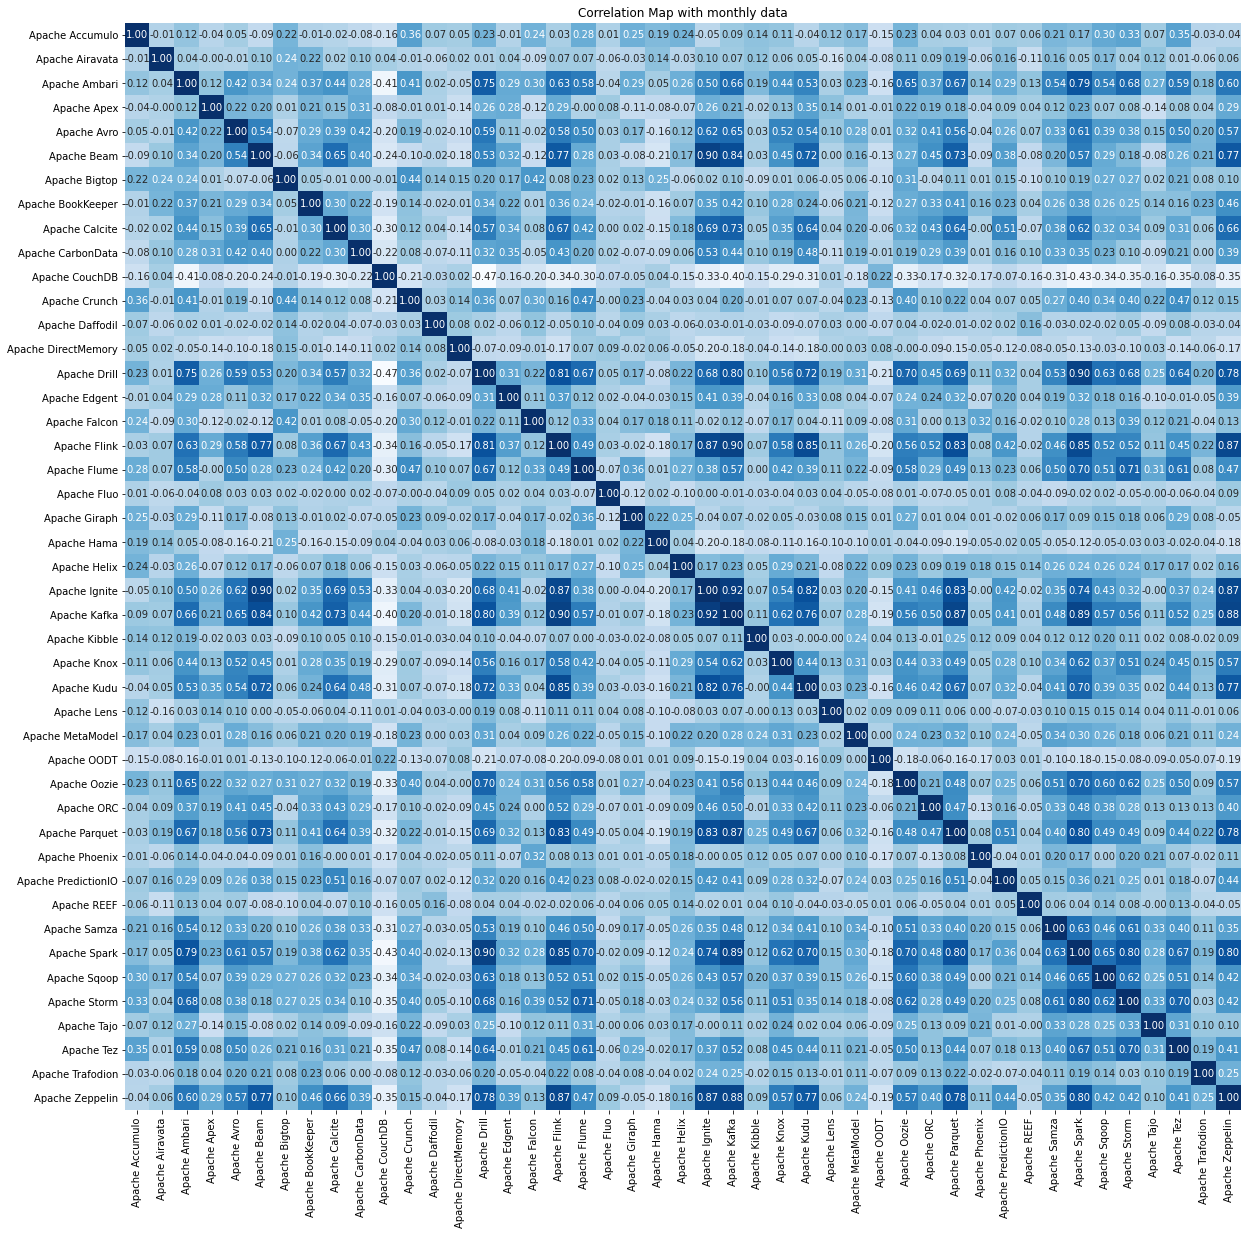

In [69]:
plt.figure(figsize=(20,20))
sns.heatmap(Apache_monthly.corr(),cmap='Blues',annot=True,fmt = ".2f",cbar=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Correlation Map with monthly data')
plt.show()

In [70]:
kw_list = set_new_query(["AWS", "Azure", "Google Cloud Platform", "IBM Cloud","Oracle"], "all")

In [71]:
df = table_interest_over_time(kw_list, None, True);

In [72]:
display(df.describe().T.round(2))
display(df.corr().round(2))

,count,mean,std,min,25%,50%,75%,max
AWS,218.0,4.33,4.21,1.0,1.0,2.0,8.00,14.0
Azure,218.0,4.32,3.56,1.0,2.0,2.0,6.75,15.0
Google Cloud Platform,218.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0
IBM Cloud,218.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0
Oracle,218.0,39.52,22.25,12.0,22.0,32.0,53.00,100.0


,AWS,Azure,Google Cloud Platform,IBM Cloud,Oracle
AWS,1.00,0.97,NaN,NaN,-0.7
Azure,0.97,1.00,NaN,NaN,-0.7
Google Cloud Platform,NaN,NaN,NaN,NaN,NaN
IBM Cloud,NaN,NaN,NaN,NaN,NaN
Oracle,-0.70,-0.70,NaN,NaN,1.0


In [73]:
plot_interest_over_time(kw_list, df)

,Date,AWS,Azure,Google Cloud Platform,IBM Cloud,Oracle
0,2004-01-01,1,2,0,0,86
1,2004-02-01,1,2,0,0,100
2,2004-03-01,1,1,0,0,92
3,2004-04-01,1,2,0,0,94
4,2004-05-01,1,2,0,0,91
...,...,...,...,...,...,...
213,2021-10-01,11,10,0,0,13
214,2021-11-01,10,11,0,0,12
215,2021-12-01,12,10,0,0,12
216,2022-01-01,11,11,0,0,12


In [74]:
df_by_region = table_interest_by_region(kw_list, None, True)

In [75]:
barplot_interest_by_region(kw_list, df_by_region)

,Region,AWS,Azure,Google Cloud Platform,IBM Cloud,Oracle
0,Argentina,15,14,0,0,71
1,Australia,24,26,0,0,50
2,Austria,19,16,0,0,65
3,Belgium,10,24,0,0,66
4,Brazil,15,13,0,0,72
5,Bulgaria,15,22,0,0,63
6,Canada,17,23,0,0,60
7,Chile,13,11,0,0,76
8,China,5,4,0,0,91
9,Colombia,13,12,0,0,75


In [76]:
kw_list = set_new_query(["Amazon Rekognition", "Emotion API", "Face API", "Computer Vision API","Vision API"], "all")

In [77]:
df = table_interest_over_time(kw_list, None, True);

In [78]:
display(df.describe().T.round(2))
display(df.corr().round(2))

,count,mean,std,min,25%,50%,75%,max
Amazon Rekognition,218.0,3.69,6.77,0.0,0.0,0.0,5.00,32.0
Emotion API,218.0,2.09,3.67,0.0,0.0,0.0,3.00,28.0
Face API,218.0,27.65,18.13,0.0,15.0,28.0,41.00,63.0
Computer Vision API,218.0,2.44,3.70,0.0,0.0,0.0,4.00,17.0
Vision API,218.0,24.67,27.61,0.0,4.0,11.0,41.75,100.0


,Amazon Rekognition,Emotion API,Face API,Computer Vision API,Vision API
Amazon Rekognition,1.00,0.50,0.61,0.70,0.79
Emotion API,0.50,1.00,0.42,0.40,0.64
Face API,0.61,0.42,1.00,0.58,0.64
Computer Vision API,0.70,0.40,0.58,1.00,0.74
Vision API,0.79,0.64,0.64,0.74,1.00


In [79]:
plot_interest_over_time(kw_list, df)

,Date,Amazon Rekognition,Emotion API,Face API,Computer Vision API,Vision API
0,2004-01-01,0,0,0,0,0
1,2004-02-01,0,0,0,0,0
2,2004-03-01,0,0,0,0,0
3,2004-04-01,0,0,53,0,0
4,2004-05-01,0,0,0,0,0
...,...,...,...,...,...,...
213,2021-10-01,14,1,24,2,26
214,2021-11-01,6,2,19,4,29
215,2021-12-01,7,3,30,3,25
216,2022-01-01,7,1,17,1,17


In [80]:
coff=df.corr()

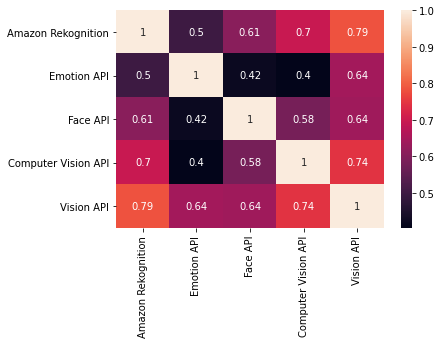

<Figure size 2880x2880 with 0 Axes>

In [81]:
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
sns.heatmap(coff, xticklabels=coff.columns, yticklabels=coff.columns, annot=True)
plt.figure(figsize=(40,40))
plt.show()

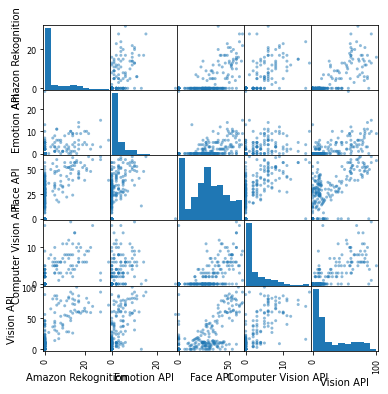

In [82]:
pd.plotting.scatter_matrix(df, figsize=(6, 6))
plt.show()